# Uniformly Distributed Points on a Circle

*Randomly generate points on the circumference of a circle, then calculate the variance of its distribution.* 

### Proof

Suppose we have the following uniform distribution $X$ with a radius of $r = 1$:

\begin{equation*}
X = \left(X_1 = \frac{X_1}{\sqrt{X_1^2 + X_2^2}}, X_2 = \frac{X_2}{\sqrt{X_1^2 + X_2^2}} \right)
\end{equation*}

where $X_i$ are iid and follow a standard normal distribution. We're looking for $\text{var}(X) = E[X^2] - E[X]^2$. Since $X_i$ follows a uniform distribution, we know that $E[X] = 0$. Therefore, $\text{var}(X) = E[X^2]$. To solve for $E[X^2]$, notice that:

\begin{equation*}
X^2 = \frac{X_1^2}{X_1^2 + X_2^2} + \frac{X_2^2}{X_1^2 + X_2^2} = 1 = r^2
\end{equation*}

Taking the expected value of both sides, we have $E[X^2] = E[r^2]$. To solve for $E[r^2]$, we first need the PDF of $r$. The area of a circle ($A(r) = \pi r^2$) is proportional to $r$. So, it's PDF $p(r)$ (the circumference of a circle) is the derivative of that proportionality:

\begin{equation*}
p(r) = \frac{dA(r)}{dr} \propto 2 \pi r
\end{equation*}

We can solve for the proportionality constant $k$ by integrating $\int_{0}^{1} k p(r)dr = 1$:

\begin{equation*}
\begin{split}
\int_{0}^{1} k p(r)dr &= k \pi r^2 \biggr]_0^1 = k \pi = 1 \\
\Rightarrow k = \frac{1}{\pi}
\end{split}
\end{equation*}

Which means $p(r) = \frac{1}{\pi}(2 \pi r) = 2r$. Now, we can solve for $E[r^2]$:

\begin{equation*}
\begin{split}
E[r^2] = \int_{0}^{1}  r^2 2r dr = \frac{1}{2}
\end{split}
\end{equation*}

Therefore,

\begin{equation*}
\begin{split}
\boxed{\text{var}(X) = E[X^2] = E[r^2] = \frac{1}{2}}
\end{split}
\end{equation*}

### Simulation

We relate polar and cartesian coordinates with $x = r \text{cos}(\theta)$ and $y = r \text{sin}(\theta)$. To generate random points $(x, y)$, $\theta$ is multiplied by a random number in the range [0,1]. 

var(x) = 0.49217213759951256


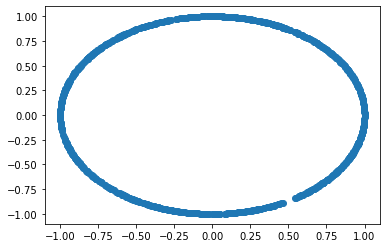

In [1]:
import matplotlib.pyplot as plt
from math import pi, cos, sin
from random import random
from statistics import variance

def get_points_on_circle(n, r):
    xy = []
    for _ in range(n):
        theta = random() * 2 * pi
        xy.append([r * cos(theta), r * sin(theta)])
    return xy

# Calculate var(x)
xy = get_points_on_circle(1000, 1)
x = [pair[0] for pair in xy]
print("var(x) =", variance(x))

# Plot (x,y)
plt.scatter(*zip(*xy))
plt.show()